In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy.stats as st
%matplotlib inline

In [2]:
m11 = pd.read_csv("/Users/Oscar/Documents/Research/GW190521/Overleaf Distributions/m11distribution.csv")

In [3]:
m11

,m11_mass,m12_mass,m1_merged,pm1_dist,pimk,astroprimary,probabilitym11
0,31,30,58,0.000015,0.002407,0.013810,0.000088
1,32,29,58,0.000015,0.002407,0.013704,0.000087
2,32,30,59,0.000015,0.002211,0.013704,0.000095
3,32,31,60,0.000046,0.001952,0.013704,0.000323
4,33,28,58,0.000015,0.002407,0.012923,0.000082
...,...,...,...,...,...,...,...
2296,91,26,117,0.001396,0.000004,0.000004,0.001476
2297,91,34,117,0.001396,0.000004,0.000004,0.001476
2298,91,27,118,0.001182,0.000003,0.000004,0.001873
2299,91,28,119,0.001197,0.000002,0.000004,0.002044


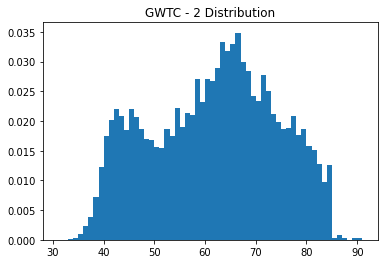

In [8]:
m11length = max(m11['m11_mass']) - min(m11['m11_mass'])
nm11, binsm11, _ = plt.hist(m11['m11_mass'], weights = m11['probabilitym11'], bins = m11length, density = True)
plt.title('GWTC - 2 Distribution')
plt.show()

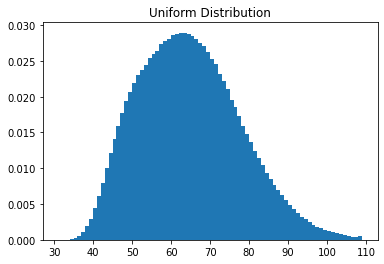

In [11]:
m1uniform = pd.read_csv("/Users/Oscar/Documents/Research/GW190521/Overleaf Distributions/m1uniform.csv")
nm11u, binsm11u, _ = plt.hist(m1uniform['m11_mergen'], weights = m1uniform['pm1_dist'], bins = 78, density = True)
plt.title('Uniform Distribution')
plt.show()

In [14]:
counts_gwtc = (nm11 * 10000000)
counts_gwtc = counts_gwtc.astype(int)
array_m11_gwtc = np.repeat(binsm11[:-1], counts_gwtc)

In [16]:
counts_uniform = (nm11u * 10000000)
counts_uniform = counts_uniform.astype(int)
array_m11_uniform = np.repeat(binsm11u[:-1], counts_uniform)

In [19]:
ci_gwtc = norm(*norm.fit(array_m11_gwtc)).interval(0.90)
ci_gwtc

(40.849196332993735, 81.52380422330798)

In [20]:
ci_uniform = norm(*norm.fit(array_m11_uniform)).interval(0.90)
ci_uniform

(42.846844405873625, 85.46845245531381)

In [22]:
#cutoff distriution to within CI

#m11_ci_uniform = [x for x in array_m11_uniform if x < ci_uniform[1] and x > ci_uniform[0]]
#m11_ci_gwtc = [x for x in array_m11_gwtc if x < ci_gwtc[1] and x > ci_gwtc[0]]

In [115]:
m11_median_uniform = np.median(array_m11_uniform)
m11_median_uniform

63.0

In [116]:
m11_median_gwtc = np.median(array_m11_gwtc)
m11_median_gwtc

62.0

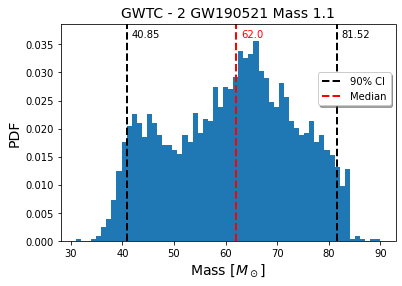

In [120]:
fig, axs = plt.subplots()

height, bins, patches = plt.hist(array_m11_gwtc[::3000], bins = m11length, density = True)
axs.vlines(ci_gwtc[0], 0, height.max() + 0.005, linestyles = 'dashed', colors = 'black', linewidth = 2)
axs.vlines(ci_gwtc[1], 0, height.max() + 0.005, linestyles = 'dashed', colors = 'black', linewidth = 2)
plt.ylim(0,height.max()+0.003)
axs.vlines(m11_median_gwtc ,0,height.max() + 0.005, linestyles = 'dashed', colors = 'red', linewidth = 2)

axs.set_title('GWTC - 2 GW190521 Mass 1.1', fontsize = 14)
axs.set_xlabel('Mass [$M_\odot$]', fontsize = 14)
axs.set_ylabel('PDF', fontsize = 14)

axs.annotate(round(ci_gwtc[0],2), xy=(ci_gwtc[0]+1, 0.0362))
axs.annotate(round(ci_gwtc[1],2), xy=(ci_gwtc[1]+1, 0.0362))
axs.annotate(m11_median_gwtc, xy=(m11_median_gwtc+1, 0.0362), color = 'red')

plt.rc('legend', fontsize=10, loc = 'right') 
leg = axs.legend(labels=["90% CI", "Median"],
                 fancybox=True, shadow = True, bbox_to_anchor = (1,.7))
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('red')

plt.show()

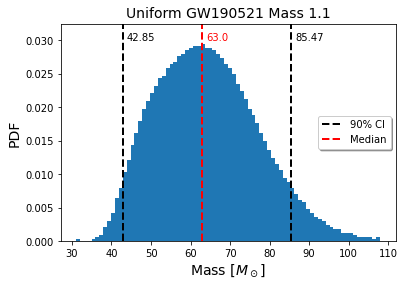

In [121]:
fig, axs = plt.subplots()

height, bins, patches = plt.hist(array_m11_uniform[::3000], bins = 78, density = True)
axs.vlines(ci_uniform[0], 0, height.max() + 0.005, linestyles = 'dashed', colors = 'black', linewidth = 2)
axs.vlines(ci_uniform[1], 0, height.max() + 0.005, linestyles = 'dashed', colors = 'black', linewidth = 2)
plt.ylim(0,height.max()+0.003)
axs.vlines(m11_median_uniform ,0,height.max() + 0.005, linestyles = 'dashed', colors = 'red', linewidth = 2)

axs.set_title('Uniform GW190521 Mass 1.1', fontsize = 14)
axs.set_xlabel('Mass [$M_\odot$]', fontsize = 14)
axs.set_ylabel('PDF', fontsize = 14)

axs.annotate(round(ci_uniform[0],2), xy=(ci_uniform[0]+1, 0.03))
axs.annotate(round(ci_uniform[1],2), xy=(ci_uniform[1]+1, 0.03))
axs.annotate(m11_median_uniform, xy=(m11_median_uniform+1, 0.03), color = 'red')

plt.rc('legend', fontsize=10, loc = 'right') 
leg = axs.legend(labels=["90% CI", "Median"],
                 fancybox=True, shadow = True)
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('red')

plt.show()

In [122]:
#Symmetric
#find 5% from either side

bin_width_m11_gwtc = binsm11[1] - binsm11[0]
percent_gwtc = []
for i in range(len(binsm11)):
    percent_gwtc += [round(bin_width_m11_gwtc * sum(nm11[i:]),4)* 100]

lower5_gwtc_loc = min(enumerate(percent_gwtc), key=lambda x: abs(x[1]-95))
upper5_gwtc_loc = min(enumerate(percent_gwtc), key=lambda x: abs(x[1]-5))

#uniform

bin_width_m11_uniform = binsm11u[1] - binsm11u[0]
percent_uniform = []
for i in range(len(binsm11u)):
    percent_uniform += [round(bin_width_m11_uniform * sum(nm11u[i:]),4)* 100]

lower5_uniform_loc = min(enumerate(percent_uniform), key=lambda x: abs(x[1]-95))
upper5_uniform_loc = min(enumerate(percent_uniform), key=lambda x: abs(x[1]-5))

In [123]:
lower5_gwtc = binsm11[lower5_gwtc_loc[0]]
upper5_gwtc = binsm11[upper5_gwtc_loc[0]]

lower5_uniform = binsm11u[lower5_uniform_loc[0]]
upper5_uniform = binsm11u[upper5_uniform_loc[0]]

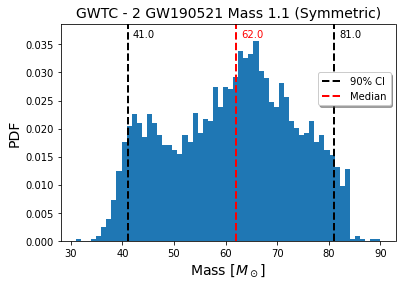

In [124]:
fig, axs = plt.subplots()

height, bins, patches = plt.hist(array_m11_gwtc[::3000], bins = m11length, density = True)
axs.vlines(lower5_gwtc, 0, height.max() + 0.005, linestyles = 'dashed', colors = 'black', linewidth = 2)
axs.vlines(upper5_gwtc, 0, height.max() + 0.005, linestyles = 'dashed', colors = 'black', linewidth = 2)
plt.ylim(0,height.max()+0.003)
axs.vlines(m11_median_gwtc ,0,height.max() + 0.005, linestyles = 'dashed', colors = 'red', linewidth = 2)

axs.set_title('GWTC - 2 GW190521 Mass 1.1 (Symmetric)', fontsize = 14)
axs.set_xlabel('Mass [$M_\odot$]', fontsize = 14)
axs.set_ylabel('PDF', fontsize = 14)

axs.annotate(lower5_gwtc, xy=(lower5_gwtc+1, 0.0362))
axs.annotate(upper5_gwtc, xy=(upper5_gwtc+1, 0.0362))
axs.annotate(m11_median_gwtc, xy=(m11_median_gwtc+1, 0.0362), color = 'red')

plt.rc('legend', fontsize=10, loc = 'right') 
leg = axs.legend(labels=["90% CI", "Median"],
                 fancybox=True, shadow = True, bbox_to_anchor = (1,.7))
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('red')

plt.show()

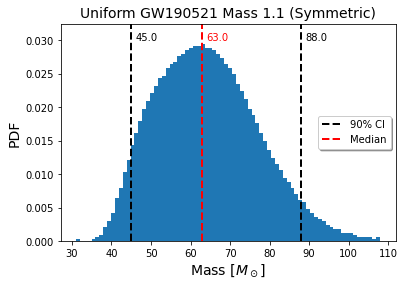

In [125]:
fig, axs = plt.subplots()

height, bins, patches = plt.hist(array_m11_uniform[::3000], bins = 78, density = True)
axs.vlines(lower5_uniform, 0, height.max() + 0.005, linestyles = 'dashed', colors = 'black', linewidth = 2)
axs.vlines(upper5_uniform, 0, height.max() + 0.005, linestyles = 'dashed', colors = 'black', linewidth = 2)
plt.ylim(0,height.max()+0.003)
axs.vlines(m11_median_uniform ,0,height.max() + 0.005, linestyles = 'dashed', colors = 'red', linewidth = 2)

axs.set_title('Uniform GW190521 Mass 1.1 (Symmetric)', fontsize = 14)
axs.set_xlabel('Mass [$M_\odot$]', fontsize = 14)
axs.set_ylabel('PDF', fontsize = 14)

axs.annotate(lower5_uniform, xy=(lower5_uniform+1, 0.03))
axs.annotate(upper5_uniform, xy=(upper5_uniform+1, 0.03))
axs.annotate(m11_median_uniform, xy=(m11_median_uniform+1, 0.03), color = 'red')

plt.rc('legend', fontsize=10, loc = 'right') 
leg = axs.legend(labels=["90% CI", "Median"],
                 fancybox=True, shadow = True)
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('red')

plt.show()